In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
pd.set_option("display.max_columns", None)

In [2]:
flights = pd.read_csv("archive/flights.csv")
airports = pd.read_csv('archive/airports.csv')
airlines = pd.read_csv('archive/airlines.csv')

/var/folders/2w/hy3qhkf90ld86v626flq0kb80000gn/T/ipykernel_13794/3384630006.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv("archive/flights.csv")


In [3]:
flights[['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']] = flights[['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']].fillna(0)

In [4]:
flights.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0


In [5]:
airports.head(5)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [6]:
airlines.head(5)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [7]:
# -----------------------
# STEP 0: Join Airlines
# -----------------------
flights = flights.merge(
    airlines,
    left_on="AIRLINE", right_on="IATA_CODE",
    how="left"
).drop(columns=["IATA_CODE"])  # drop duplicate airline code

In [8]:
# -----------------------
# STEP 1: Join Airports (Origin)
# -----------------------
flights = flights.merge(
    airports.add_prefix("ORG_"),
    left_on="ORIGIN_AIRPORT", right_on="ORG_IATA_CODE",
    how="left"
).drop(columns=["ORG_IATA_CODE", "ORG_AIRPORT"])

In [9]:
# -----------------------
# STEP 2: Join Airports (Destination)
# -----------------------
flights = flights.merge(
    airports.add_prefix("DEST_"),
    left_on="DESTINATION_AIRPORT", right_on="DEST_IATA_CODE",
    how="left"
).drop(columns=["DEST_IATA_CODE", "DESTINATION_AIRPORT"])

In [10]:
flights.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_y,ORG_CITY,ORG_STATE,ORG_COUNTRY,ORG_LATITUDE,ORG_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_COUNTRY,DEST_LATITUDE,DEST_LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,Anchorage,AK,USA,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.,Los Angeles,CA,USA,33.94254,-118.40807,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,US Airways Inc.,San Francisco,CA,USA,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.,Los Angeles,CA,USA,33.94254,-118.40807,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,Seattle,WA,USA,47.44898,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


In [11]:
# -----------------------
# STEP 3: Drop redundant text columns
# -----------------------
drop_cols = [
    "AIRPORT", "CITY", "STATE", "COUNTRY"  # we keep lat/long instead
]
drop_cols = [f"ORG_{c}" for c in drop_cols] + [f"DEST_{c}" for c in drop_cols] + ["AIRLINE"]
flights = flights.drop(columns=drop_cols, errors="ignore")

In [12]:
flights.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_y,ORG_LATITUDE,ORG_LONGITUDE,DEST_LATITUDE,DEST_LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,61.17432,-149.99619,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.,33.94254,-118.40807,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,US Airways Inc.,37.61900,-122.37484,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.,33.94254,-118.40807,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,47.44898,-122.30931,61.17432,-149.99619


In [13]:
# -----------------------
# STEP 4: Encode categoricals
# -----------------------
# After join, we only keep AIRLINE name col as categorical (rest dropped above)
if "AIRLINE_y" in flights.columns:  # in case duplicate naming occurred
    flights.rename(columns={"AIRLINE_y": "AIRLINE_NAME"}, inplace=True)

categorical_cols = [c for c in ["AIRLINE_x","TAIL_NUMBER","ORIGIN_AIRPORT","AIRLINE_NAME", "CANCELLATION_REASON"] if c in flights.columns]

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    flights[col] = le.fit_transform(flights[col].astype(str))
    le_dict[col] = le  # save encoders if needed later

In [14]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,ORG_LATITUDE,ORG_LONGITUDE,DEST_LATITUDE,DEST_LONGITUDE
0,2015,1,1,4,1,98,1622,323,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,4,0.0,0.0,0.0,0.0,0.0,0,61.17432,-149.99619,47.44898,-122.30931
1,2015,1,1,4,0,2336,1556,482,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,4,0.0,0.0,0.0,0.0,0.0,1,33.94254,-118.40807,26.68316,-80.09559
2,2015,1,1,4,11,840,421,584,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,4,0.0,0.0,0.0,0.0,0.0,11,37.61900,-122.37484,35.21401,-80.94313
3,2015,1,1,4,0,258,1516,482,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,4,0.0,0.0,0.0,0.0,0.0,1,33.94254,-118.40807,25.79325,-80.29056
4,2015,1,1,4,1,135,2131,583,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,4,0.0,0.0,0.0,0.0,0.0,0,47.44898,-122.30931,61.17432,-149.99619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,2,688,2885,482,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,4,0.0,0.0,0.0,0.0,0.0,7,33.94254,-118.40807,42.36435,-71.00518
5819075,2015,12,31,4,2,745,3947,472,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,4,0.0,0.0,0.0,0.0,0.0,7,40.63975,-73.77893,18.00830,-66.56301
5819076,2015,12,31,4,2,1503,4417,472,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,4,0.0,0.0,0.0,0.0,0.0,7,40.63975,-73.77893,18.43942,-66.00183
5819077,2015,12,31,4,2,333,2132,499,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,4,0.0,0.0,0.0,0.0,0.0,7,28.42889,-81.31603,18.43942,-66.00183


In [15]:
flights = flights.dropna(subset = ['ORG_LATITUDE','ORG_LONGITUDE','DEST_LATITUDE','DEST_LONGITUDE'])

In [16]:
flights.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,ORG_LATITUDE,ORG_LONGITUDE,DEST_LATITUDE,DEST_LONGITUDE
0,2015,1,1,4,1,98,1622,323,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,4,0.0,0.0,0.0,0.0,0.0,0,61.17432,-149.99619,47.44898,-122.30931
1,2015,1,1,4,0,2336,1556,482,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,4,0.0,0.0,0.0,0.0,0.0,1,33.94254,-118.40807,26.68316,-80.09559
2,2015,1,1,4,11,840,421,584,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,4,0.0,0.0,0.0,0.0,0.0,11,37.61900,-122.37484,35.21401,-80.94313
3,2015,1,1,4,0,258,1516,482,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,4,0.0,0.0,0.0,0.0,0.0,1,33.94254,-118.40807,25.79325,-80.29056
4,2015,1,1,4,1,135,2131,583,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,4,0.0,0.0,0.0,0.0,0.0,0,47.44898,-122.30931,61.17432,-149.99619


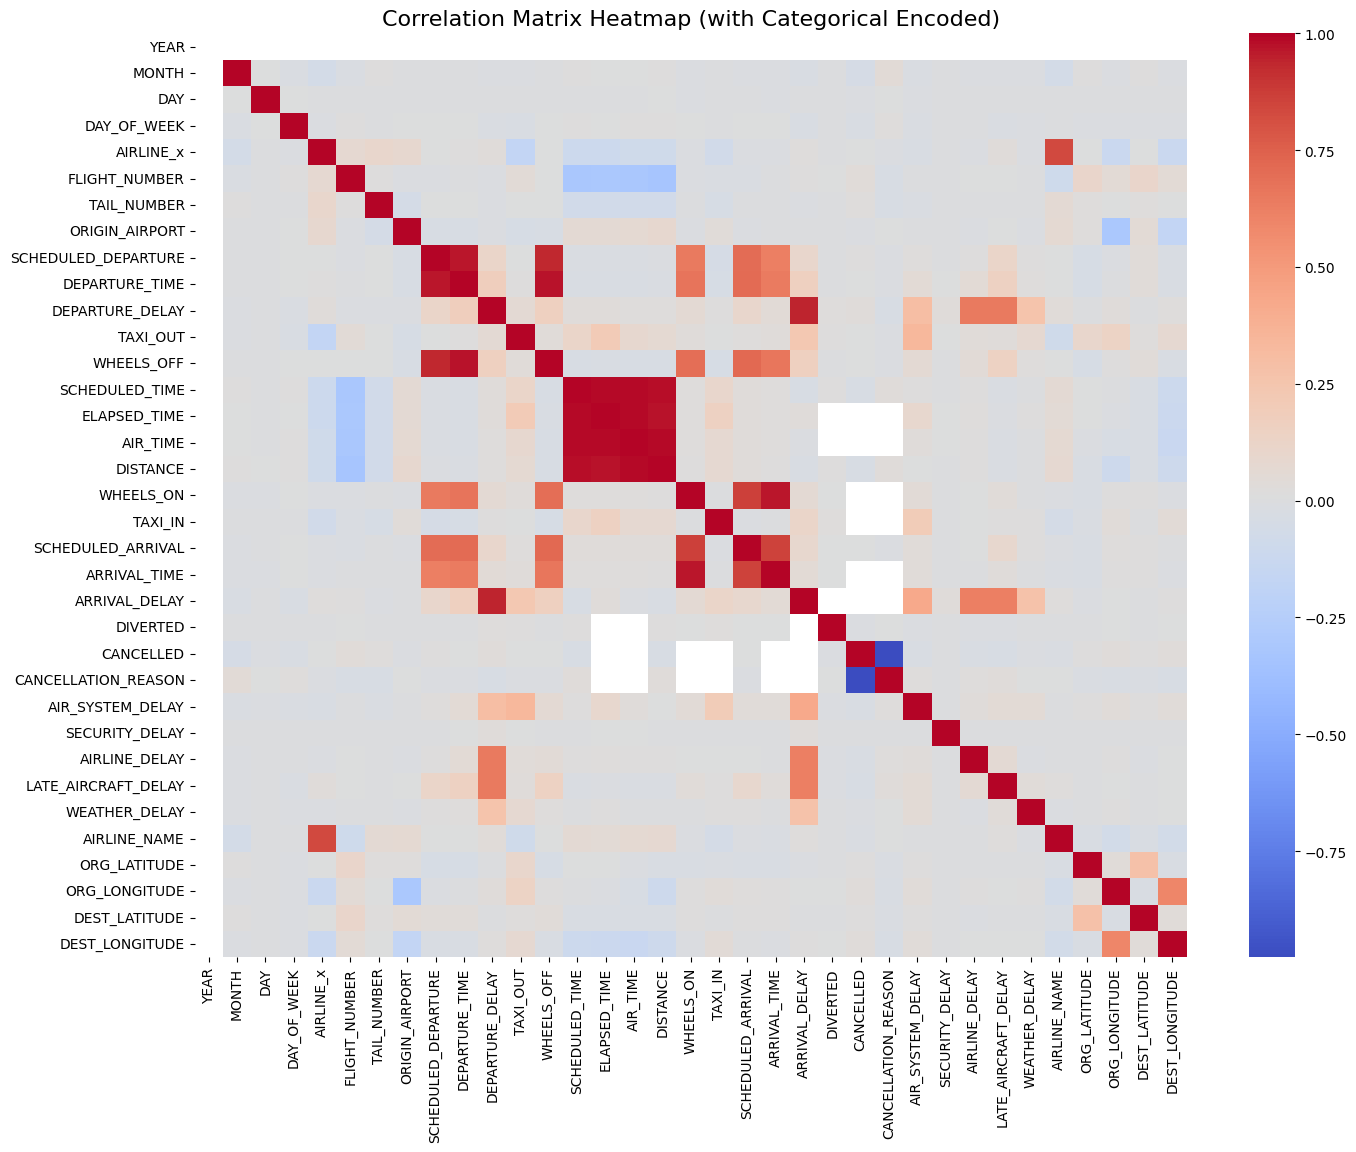

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Now compute correlation on full dataset
corr_matrix = flights.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", 
            xticklabels=True, yticklabels=True)
plt.title("Correlation Matrix Heatmap (with Categorical Encoded)", fontsize=16)
plt.show()

In [18]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE_x', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_NAME', 'ORG_LATITUDE', 'ORG_LONGITUDE',
       'DEST_LATITUDE', 'DEST_LONGITUDE'],
      dtype='object')

FEATURE-TARGET CORRELATIONS (sorted by strength):
DEPARTURE_DELAY     :  0.9452 (Positive, Very Strong)
LATE_AIRCRAFT_DELAY :  0.6254 (Positive, Strong)
AIRLINE_DELAY       :  0.6249 (Positive, Strong)
AIR_SYSTEM_DELAY    :  0.4252 (Positive, Moderate)
WEATHER_DELAY       :  0.2720 (Positive, Weak)
TAXI_OUT            :  0.2281 (Positive, Weak)
DEPARTURE_TIME      :  0.1629 (Positive, Very Weak)
WHEELS_OFF          :  0.1588 (Positive, Very Weak)
TAXI_IN             :  0.1178 (Positive, Very Weak)
SCHEDULED_DEPARTURE :  0.1032 (Positive, Very Weak)
SCHEDULED_ARRIVAL   :  0.0910 (Positive, Very Weak)
WHEELS_ON           :  0.0592 (Positive, Very Weak)
ARRIVAL_TIME        :  0.0501 (Positive, Very Weak)
ELAPSED_TIME        :  0.0302 (Positive, Very Weak)
SCHEDULED_TIME      : -0.0291 (Negative, Very Weak)
SECURITY_DELAY      :  0.0283 (Positive, Very Weak)
MONTH               : -0.0264 (Negative, Very Weak)
DISTANCE            : -0.0247 (Negative, Very Weak)
AIRLINE_NAME        :  0.0224

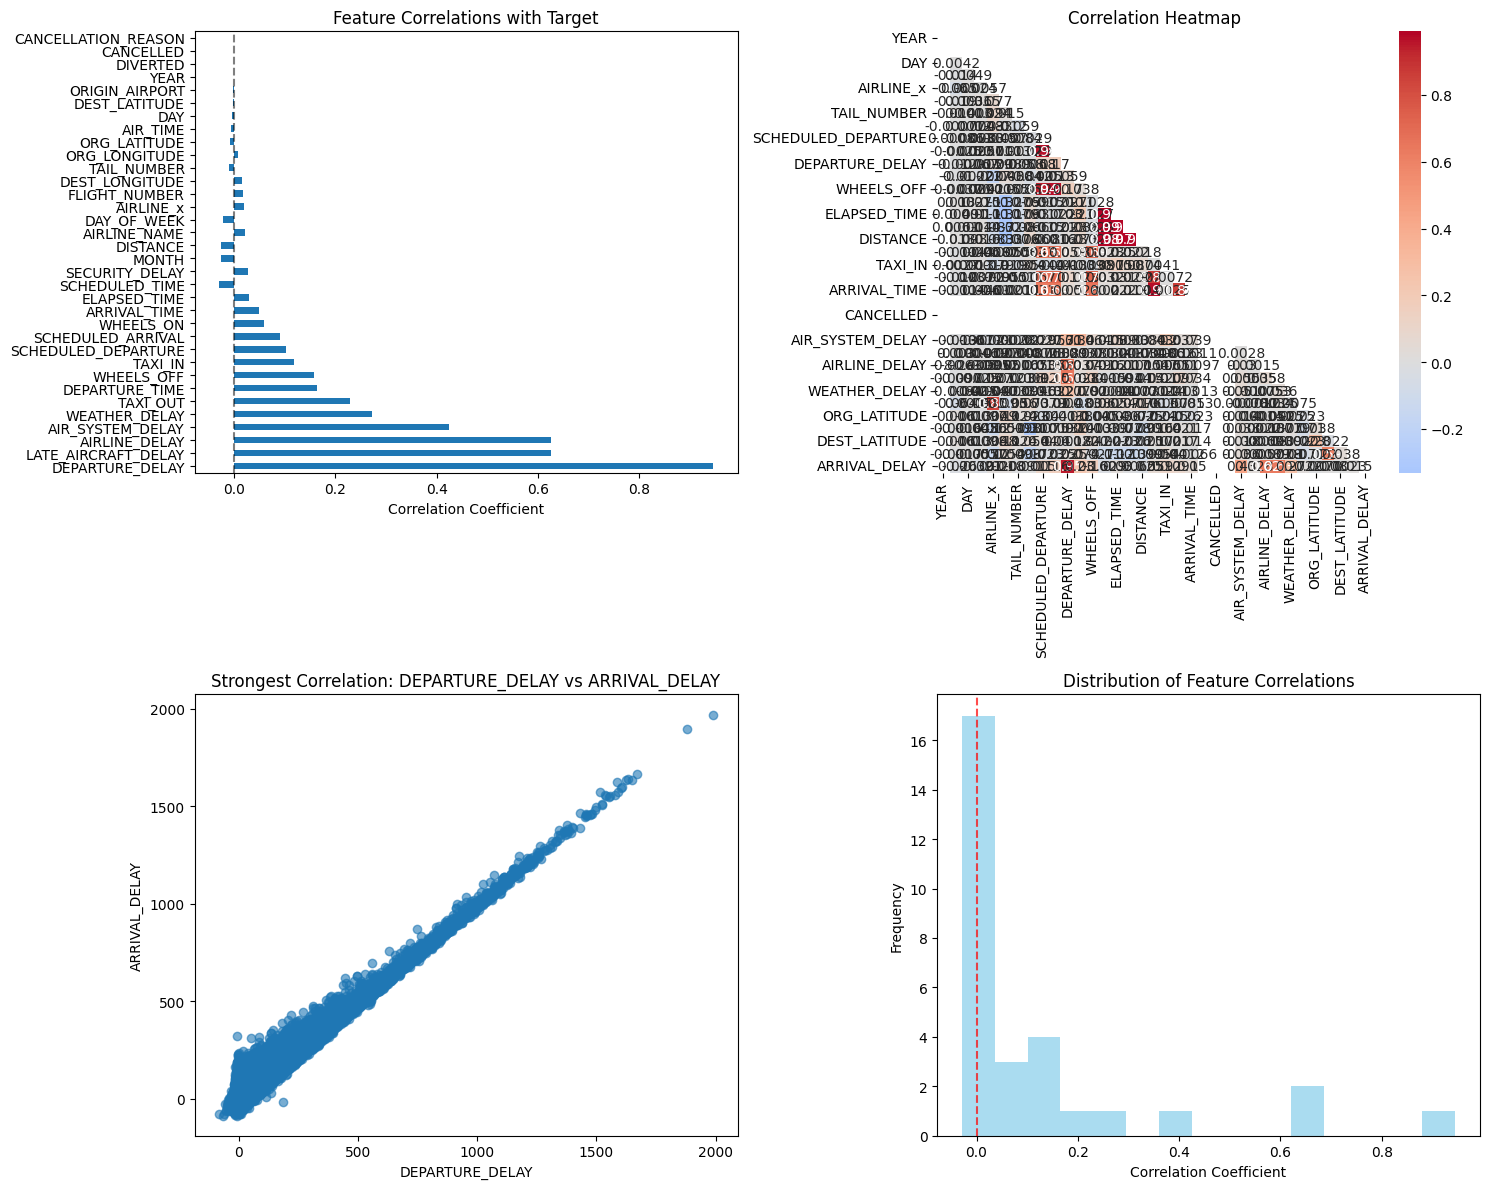

DEPARTURE_DELAY        0.945185
LATE_AIRCRAFT_DELAY    0.625372
AIRLINE_DELAY          0.624932
AIR_SYSTEM_DELAY       0.425176
WEATHER_DELAY          0.271984
TAXI_OUT               0.228078
DEPARTURE_TIME         0.162925
WHEELS_OFF             0.158763
TAXI_IN                0.117817
SCHEDULED_DEPARTURE    0.103178
SCHEDULED_ARRIVAL      0.091023
WHEELS_ON              0.059198
ARRIVAL_TIME           0.050145
ELAPSED_TIME           0.030248
SCHEDULED_TIME        -0.029100
SECURITY_DELAY         0.028340
MONTH                 -0.026442
DISTANCE              -0.024719
AIRLINE_NAME           0.022416
DAY_OF_WEEK           -0.021248
AIRLINE_x              0.019896
FLIGHT_NUMBER          0.017523
DEST_LONGITUDE         0.014865
TAIL_NUMBER           -0.009084
ORG_LONGITUDE          0.008049
ORG_LATITUDE          -0.007054
AIR_TIME              -0.006464
DAY                   -0.003909
DEST_LATITUDE         -0.002266
ORIGIN_AIRPORT        -0.001468
YEAR                        NaN
DIVERTED

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

def analyze_feature_target_correlations(data, target_column, 
                                      create_plots=True, 
                                      save_plots=False):
    """
    Comprehensive correlation analysis with visualizations
    """
    
    # Calculate correlations
    features = data.drop(columns=[target_column])
    target = data[target_column]
    
    # Get numeric columns only
    numeric_features = features.select_dtypes(include=[np.number])
    
    # Calculate correlation matrix
    corr_data = pd.concat([numeric_features, target], axis=1)
    correlation_matrix = corr_data.corr()
    target_correlations = correlation_matrix[target_column].drop(target_column)
    
    # Sort by absolute correlation
    target_correlations_sorted = target_correlations.reindex(
        target_correlations.abs().sort_values(ascending=False).index
    )
    
    # Print results
    print("FEATURE-TARGET CORRELATIONS (sorted by strength):")
    print("=" * 50)
    for feature, corr in target_correlations_sorted.items():
        strength = "Very Strong" if abs(corr) > 0.8 else \
                  "Strong" if abs(corr) > 0.6 else \
                  "Moderate" if abs(corr) > 0.4 else \
                  "Weak" if abs(corr) > 0.2 else "Very Weak"
        
        direction = "Positive" if corr > 0 else "Negative"
        print(f"{feature:<20}: {corr:7.4f} ({direction}, {strength})")
    
    if create_plots:
        # Create visualizations
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 1. Correlation bar plot
        target_correlations_sorted.plot(kind='barh', ax=axes[0,0])
        axes[0,0].set_title('Feature Correlations with Target')
        axes[0,0].set_xlabel('Correlation Coefficient')
        axes[0,0].axvline(x=0, color='black', linestyle='--', alpha=0.5)
        
        # 2. Correlation heatmap
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        sns.heatmap(correlation_matrix, mask=mask, annot=True, 
                   cmap='coolwarm', center=0, ax=axes[0,1])
        axes[0,1].set_title('Correlation Heatmap')
        
        # 3. Scatter plot of strongest correlation
        strongest_feature = target_correlations_sorted.abs().idxmax()
        axes[1,0].scatter(data[strongest_feature], data[target_column], alpha=0.6)
        axes[1,0].set_xlabel(strongest_feature)
        axes[1,0].set_ylabel(target_column)
        axes[1,0].set_title(f'Strongest Correlation: {strongest_feature} vs {target_column}')
        
        # 4. Distribution of correlations
        axes[1,1].hist(target_correlations_sorted.values, bins=15, alpha=0.7, color='skyblue')
        axes[1,1].set_xlabel('Correlation Coefficient')
        axes[1,1].set_ylabel('Frequency')
        axes[1,1].set_title('Distribution of Feature Correlations')
        axes[1,1].axvline(x=0, color='red', linestyle='--', alpha=0.7)
        
        plt.tight_layout()
        
        if save_plots:
            plt.savefig('correlation_analysis.png', dpi=300, bbox_inches='tight')
        
        plt.show()
    
    return target_correlations_sorted

# Simple correlation function without plots
def simple_correlations(data, target_column):
    """
    Quick correlation calculation without visualizations
    """
    correlations = data.corr()[target_column].drop(target_column).sort_values(key=abs, ascending=False)
    
    print("FEATURE-TARGET CORRELATIONS:")
    print("=" * 35)
    for feature, corr in correlations.items():
        print(f"{feature:<20}: {corr:6.3f}")
    
    return correlations

# USAGE EXAMPLES:

# Example 1: Using your existing DataFrame with all features
correlations = analyze_feature_target_correlations(flights, "ARRIVAL_DELAY")

# Example 2: Using only specific features
# features_before_boarding = [
#     "YEAR", "MONTH", "DAY", "DAY_OF_WEEK",
#     "AIRLINE_x", "FLIGHT_NUMBER", "TAIL_NUMBER", "ORIGIN_AIRPORT",
#     "SCHEDULED_DEPARTURE", "SCHEDULED_ARRIVAL",
#     "DISTANCE",
#     "ORG_LATITUDE", "ORG_LONGITUDE", "DEST_LATITUDE", "DEST_LONGITUDE",
#     "DEPARTURE_DELAY"  # Don't forget the target!
# ]

# df_filtered = flights[features_before_boarding]
# correlations = analyze_feature_target_correlations(df_filtered, "DEPARTURE_DELAY")

# Example 3: Quick correlations without plots
# correlations = simple_correlations(df, "DEPARTURE_DELAY")

# Example 4: One-liner for just the correlation values
# correlations = df.corr()["DEPARTURE_DELAY"].drop("DEPARTURE_DELAY").sort_values(key=abs, ascending=False)
print(correlations)

In [26]:
# Print number of missing values per column
nan_counts = flights.isna().sum()
print(nan_counts)

# Optional: only show columns that have NaNs
nan_counts_only = nan_counts[nan_counts > 0]
print("\nColumns with missing values:\n", nan_counts_only)

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE_x              0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
AIRLINE_NAME           0
ORG_LATITUDE           0
ORG_LONGITUDE          0
DEST_LATITUDE          0
DEST_LONGITUDE         0
dtype: int64

Columns with missing values:
 Series([], dtype: int64)


In [27]:
flights = flights.dropna(subset=['DEPARTURE_TIME','SCHEDULED_TIME', 'TAXI_OUT', 'ELAPSED_TIME', 'ARRIVAL_TIME'])
# Get missing values count
missing_values = flights.isna().sum()

# Filter only columns with missing values and sort by count
missing_values = missing_values[missing_values > 0].sort_values(ascending=True)

# Print with formatting
print("Columns with missing values:")
for column, count in missing_values.items():
    print(f"{column} {count}")

Columns with missing values:


# Linear Regression

In [ ]:
# from sklearn.model_selection import cross_val_score, KFold
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score, make_scorer
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# # Keep your existing feature selection
# selected_features = [
#     'DEPARTURE_DELAY',      # r = 0.945 (Very Strong)
#     'LATE_AIRCRAFT_DELAY',  # r = 0.625 (Strong)
#     'AIRLINE_DELAY',        # r = 0.625 (Strong)
#     'AIR_SYSTEM_DELAY',     # r = 0.425 (Moderate)
#     'WEATHER_DELAY',        # r = 0.272 (Weak)
#     'TAXI_OUT',            # r = 0.228 (Weak)
# ]

# # Prepare the data
# X = flights[selected_features]
# y = flights['ARRIVAL_DELAY']

# # Initialize the scaler and model
# scaler = StandardScaler()
# model = LinearRegression()

# # Set up k-fold cross-validation
# n_folds = 5
# kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# # Lists to store scores
# r2_scores = []
# rmse_scores = []

# # Perform cross-validation
# for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
#     # Split data
#     X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
#     y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
#     # Scale features
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_val_scaled = scaler.transform(X_val)
    
#     # Train model
#     model.fit(X_train_scaled, y_train)
    
#     # Make predictions
#     y_pred = model.predict(X_val_scaled)
    
#     # Calculate metrics
#     r2 = r2_score(y_val, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
#     # Store scores
#     r2_scores.append(r2)
#     rmse_scores.append(rmse)
    
#     print(f"\nFold {fold} Results:")
#     print(f"R² Score: {r2:.4f}")
#     print(f"RMSE: {rmse:.4f}")

# # Print average results
# print("\nCross-Validation Results:")
# print("=" * 25)
# print(f"Mean R² Score: {np.mean(r2_scores):.4f} (+/- {np.std(r2_scores):.4f})")
# print(f"Mean RMSE: {np.mean(rmse_scores):.4f} (+/- {np.std(rmse_scores):.4f})")

# # Train final model on full training set
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# model.fit(X_train_scaled, y_train)
# y_pred = model.predict(X_test_scaled)

# # Feature importance for final model
# feature_importance = pd.DataFrame({
#     'Feature': selected_features,
#     'Coefficient': model.coef_
# })


Fold 1 Results:
R² Score: 0.9488
RMSE: 9.0427

Fold 2 Results:
R² Score: 0.9478
RMSE: 9.0402

Fold 2 Results:
R² Score: 0.9478
RMSE: 9.0402

Fold 3 Results:
R² Score: 0.9482
RMSE: 9.0436

Fold 3 Results:
R² Score: 0.9482
RMSE: 9.0436

Fold 4 Results:
R² Score: 0.9483
RMSE: 9.0530

Fold 4 Results:
R² Score: 0.9483
RMSE: 9.0530

Fold 5 Results:
R² Score: 0.9487
RMSE: 9.0175

Cross-Validation Results:
Mean R² Score: 0.9484 (+/- 0.0004)
Mean RMSE: 9.0394 (+/- 0.0118)

Fold 5 Results:
R² Score: 0.9487
RMSE: 9.0175

Cross-Validation Results:
Mean R² Score: 0.9484 (+/- 0.0004)
Mean RMSE: 9.0394 (+/- 0.0118)


Comprehensive Model Evaluation:
R² Score: 0.9488
RMSE: 9.04 minutes
MAE: 6.96 minutes
Explained Variance: 0.9488

Feature Importance:
               Feature  Coefficient
0      DEPARTURE_DELAY    15.785319
2        AIRLINE_DELAY    13.311676
1  LATE_AIRCRAFT_DELAY    12.955600
3     AIR_SYSTEM_DELAY     9.495967
4        WEATHER_DELAY     5.462962
5             TAXI_OUT     3.618158


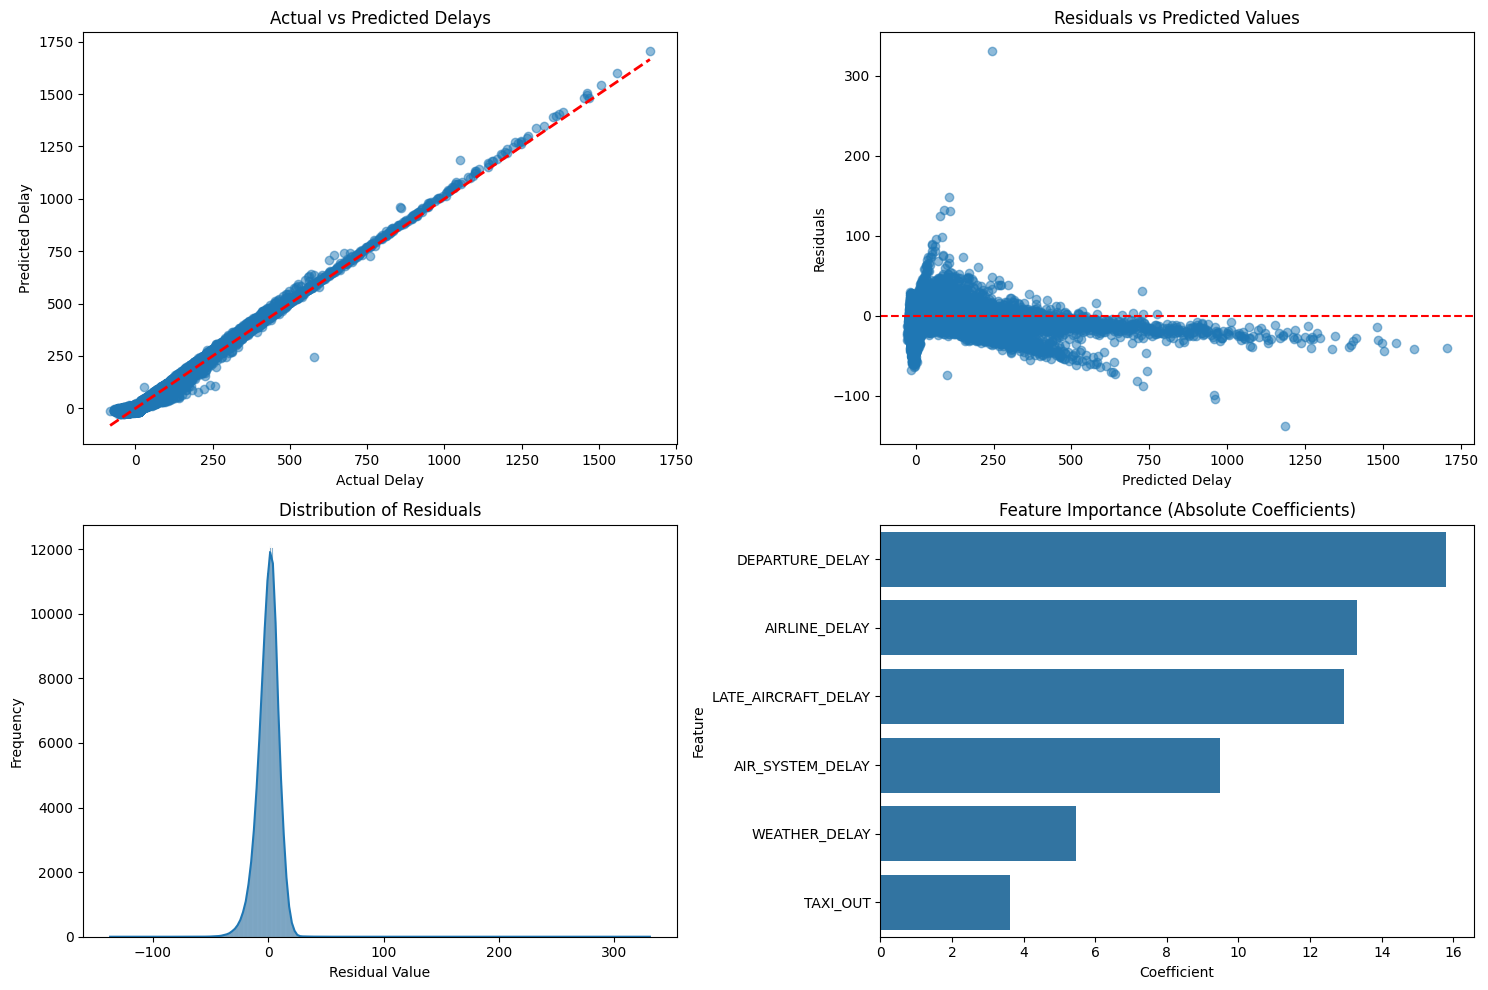


Model Assessment Summary:
Strengths:
✓ High R² score indicates good fit
✓ Good explained variance ratio
✓ Residuals are reasonably distributed

Limitations:
Predictions within 15 minutes: 91.1%
Predictions within 30 minutes: 99.5%
Predictions within 60 minutes: 100.0%


In [51]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, explained_variance_score
import seaborn as sns

# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Comprehensive Model Evaluation:")
print("=" * 30)
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f} minutes")
print(f"MAE: {mae:.2f} minutes")
print(f"Explained Variance: {explained_variance:.4f}")

# Print feature coefficients
print("\nFeature Importance:")
print("=" * 30)
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)
print(feature_importance)

# Visualizations
plt.figure(figsize=(15, 10))

# 1. Actual vs Predicted
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Delay')
plt.ylabel('Predicted Delay')
plt.title('Actual vs Predicted Delays')

# 2. Residuals Plot
plt.subplot(2, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Delay')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

# 3. Residuals Distribution
plt.subplot(2, 2, 3)
sns.histplot(residuals, kde=True)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

# 4. Feature Importance Plot
plt.subplot(2, 2, 4)
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Absolute Coefficients)')

plt.tight_layout()
plt.show()

# Model Assessment Summary
print("\nModel Assessment Summary:")
print("=" * 30)
print("Strengths:")
if r2 > 0.7:
    print("✓ High R² score indicates good fit")
if explained_variance > 0.7:
    print("✓ Good explained variance ratio")
if np.abs(residuals).mean() < rmse:
    print("✓ Residuals are reasonably distributed")

print("\nLimitations:")
if r2 < 0.7:
    print("✗ Low R² score suggests poor fit")
if explained_variance < 0.7:
    print("✗ Low explained variance ratio")
if np.abs(residuals).mean() > rmse:
    print("✗ Large residuals indicate prediction issues")

# Calculate percentage of predictions within different error ranges
error_ranges = [15, 30, 60]  # minutes
for minutes in error_ranges:
    within_range = np.mean(np.abs(residuals) <= minutes) * 100
    print(f"Predictions within {minutes} minutes: {within_range:.1f}%")

# Testing different Models

In [41]:
# Setup Cell
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

selected_features = [
    'DEPARTURE_DELAY',      # r = 0.945 (Very Strong)
    'LATE_AIRCRAFT_DELAY',  # r = 0.625 (Strong)
    'AIRLINE_DELAY',        # r = 0.625 (Strong)
    'AIR_SYSTEM_DELAY',     # r = 0.425 (Moderate)
    'WEATHER_DELAY',        # r = 0.272 (Weak)
    'TAXI_OUT',            # r = 0.228 (Weak)
]

# Prepare data
X = flights[selected_features]
y = flights['ARRIVAL_DELAY']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# LINEAR REGRESSION

In [42]:
# Linear Regression
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
r2_scores = cross_val_score(linear_model, X_scaled, y, cv=5, scoring='r2')
rmse_scores = np.sqrt(-cross_val_score(linear_model, X_scaled, y, cv=5, 
                                     scoring='neg_mean_squared_error'))

print("Linear Regression Results:")
print(f"R² Score: {r2_scores.mean():.4f} (+/- {r2_scores.std() * 2:.4f})")
print(f"RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std() * 2:.2f})")

Linear Regression Results:
R² Score: 0.9470 (+/- 0.0164)
RMSE: 9.05 (+/- 0.59)


# Ridge regression

In [43]:
# Ridge Regression
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
r2_scores = cross_val_score(ridge_model, X_scaled, y, cv=5, scoring='r2')
rmse_scores = np.sqrt(-cross_val_score(ridge_model, X_scaled, y, cv=5, 
                                     scoring='neg_mean_squared_error'))

print("Ridge Regression Results:")
print(f"R² Score: {r2_scores.mean():.4f} (+/- {r2_scores.std() * 2:.4f})")
print(f"RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std() * 2:.2f})")

Ridge Regression Results:
R² Score: 0.9470 (+/- 0.0164)
RMSE: 9.05 (+/- 0.59)


# Lasso Regression

In [44]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
r2_scores = cross_val_score(lasso_model, X_scaled, y, cv=5, scoring='r2')
rmse_scores = np.sqrt(-cross_val_score(lasso_model, X_scaled, y, cv=5, 
                                     scoring='neg_mean_squared_error'))

print("Lasso Regression Results:")
print(f"R² Score: {r2_scores.mean():.4f} (+/- {r2_scores.std() * 2:.4f})")
print(f"RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std() * 2:.2f})")

Lasso Regression Results:
R² Score: 0.9401 (+/- 0.0155)
RMSE: 9.63 (+/- 0.68)


# ElasticNet

In [45]:
# ElasticNet
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
r2_scores = cross_val_score(elastic_model, X_scaled, y, cv=5, scoring='r2')
rmse_scores = np.sqrt(-cross_val_score(elastic_model, X_scaled, y, cv=5, 
                                     scoring='neg_mean_squared_error'))

print("ElasticNet Results:")
print(f"R² Score: {r2_scores.mean():.4f} (+/- {r2_scores.std() * 2:.4f})")
print(f"RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std() * 2:.2f})")

ElasticNet Results:
R² Score: 0.9046 (+/- 0.0128)
RMSE: 12.20 (+/- 1.10)


# Random Forest

In [47]:
# # Random Forest
# from sklearn.ensemble import RandomForestRegressor

# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# r2_scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='r2')
# rmse_scores = np.sqrt(-cross_val_score(rf_model, X_scaled, y, cv=5, 
#                                      scoring='neg_mean_squared_error'))

# print("Random Forest Results:")
# print(f"R² Score: {r2_scores.mean():.4f} (+/- {r2_scores.std() * 2:.4f})")
# print(f"RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std() * 2:.2f})")

# Gradient Boosting

In [49]:
# # Gradient Boosting
# from sklearn.ensemble import GradientBoostingRegressor

# gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
# r2_scores = cross_val_score(gb_model, X_scaled, y, cv=5, scoring='r2')
# rmse_scores = np.sqrt(-cross_val_score(gb_model, X_scaled, y, cv=5, 
#                                      scoring='neg_mean_squared_error'))

# print("Gradient Boosting Results:")
# print(f"R² Score: {r2_scores.mean():.4f} (+/- {r2_scores.std() * 2:.4f})")
# print(f"RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std() * 2:.2f})")

# XGBoost

In [50]:
# XGBoost
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
r2_scores = cross_val_score(xgb_model, X_scaled, y, cv=5, scoring='r2')
rmse_scores = np.sqrt(-cross_val_score(xgb_model, X_scaled, y, cv=5, 
                                     scoring='neg_mean_squared_error'))

print("XGBoost Results:")
print(f"R² Score: {r2_scores.mean():.4f} (+/- {r2_scores.std() * 2:.4f})")
print(f"RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std() * 2:.2f})")

XGBoost Results:
R² Score: 0.9346 (+/- 0.0173)
RMSE: 10.07 (+/- 1.08)


# Final Comparison

In [ ]:
# Model Comparison Visualization
results_df = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'RandomForest', 'GradientBoosting', 'XGBoost'],
    'R² Score': [model.best_score_ for model in [linear_model, ridge_model, lasso_model, 
                                                elastic_model, rf_model, gb_model, xgb_model]]
})

plt.figure(figsize=(12, 6))
sns.barplot(x='R² Score', y='Model', data=results_df)
plt.title('Model Comparison')
plt.tight_layout()
plt.show()